In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt

In [2]:
medical = pd.read_csv('C:\\Users\Servet\Desktop\insurance2.csv')
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


Q: Use bootstrap sampling to estimate the same 95% confidence interval lower limit as before.

In [11]:
np.random.seed(47)

# set up an empty array
bs_replicates = np.empty(10000)

# getting 10000 bootstrap replicates (10000) 
# replicates indicate the statistic value

for i in range(10000):
    bs_sample = np.random.choice(medical.charges, size=len(medical.charges))
    bs_replicates[i] = bs_sample.mean()


In [13]:
# estimating the same 95% confidence interval lower limit 
# since it's the lower limit, set the area under the curve as 2.5%
lower_limit = np.percentile(bs_replicates, [2.5])[0]

print("The lower limit of the 95% confidence interval is: {}".format(lower_limit))

The lower limit of the 95% confidence interval is: 12624.862119128531


Q: Calculate the 95% confidence interval for the difference between the standard deviations of insurance and non-insurance claim charges (insured - non-insured). Calculate the differences over 10000 replicates. Plot the histogram of values and mark the locations of the percentiles. State the null and alternative hypothesis and comment on whether you would retain or reject the null hypothesis in this case and why.

In [14]:
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_sample = np.random.choice(data, len(data))
        bs_replicates[i] = func(bs_sample)  

    return bs_replicates

In [7]:
#Now, we are going to create two new columns to separate the insured and uninsured claims
medical['insured'] = np.where(medical['insuranceclaim'] == 1, medical['charges'], None)
medical['uninsured'] = np.where(medical['insuranceclaim'] == 0, medical['charges'] , None)

# We will calculate the difference between standard deviations
std_difference = np.std(medical['insured']) - np.std(medical['uninsured'])
std_difference

7596.256408655181

In [22]:
# Insured group and non-insured group in arrays
insured = np.array(medical[medical['insuranceclaim']==1].charges)
uninsured = np.array(medical[medical['insuranceclaim']==0].charges)

# Difference of the standard deviation of the original sample (observed)
obs_difference_std = np.std(medical['insured']) - np.std(medical['uninsured'])
obs_difference_std

7596.256408655181

In [23]:
# difference in bootstrap relicates (for N=10000)
bs_diff_std = draw_bs_reps(insured, np.std, size=10000) - draw_bs_reps(uninsured, np.std, size=10000)
    
# getting the 95% confidence interval
ci_95 = np.percentile(bs_diff_std,[2.5, 97.5])
ci_95

print("The 95% confidence interval of the difference in standard deviation\
      between two groups is: [{} , {}]".format(ci_95[0],ci_95[1]))

The 95% confidence interval of the difference in standard deviation      between two groups is: [6666.352073316457 , 8494.905279577028]


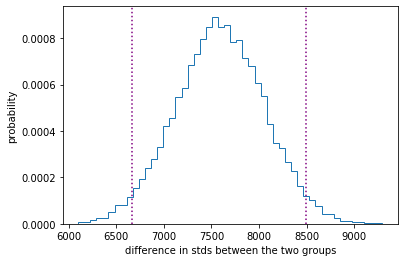

In [31]:
# plotting the histogram

plt.hist(bs_diff_std, bins=50, density=True, histtype='step')
plt.axvline(ci_95[0], color='purple', linestyle=':')
plt.axvline(ci_95[1], color='purple', linestyle=':')
plt.xlabel('difference in stds between the two groups')
plt.ylabel('probability')
plt.show()

Q: Perform a bootstrapped hypothesis test at the 5% significance level (𝛼=0.05)b to calculate the p-value of the observed difference between insurance and non-insurance charges, state your null and alternative hypotheses and whether you retain or reject the null hypothesis for the given significance level.

In [25]:
# First calculate the combined mean
combined_mean = np.mean(np.concatenate((insured, uninsured)))

# Generate the shifted dataset 
insured_shifted = insured - np.mean(insured) + combined_mean
uninsured_shifted = uninsured - np.mean(uninsured) + combined_mean

In [26]:
# Draw the bootstrap replicates from the shifted dataset
bs_replicates_insured = draw_bs_reps(insured_shifted, np.mean, size=1000)
bs_replicates_uninsured = draw_bs_reps(uninsured_shifted, np.mean, size=1000)

In [28]:
# Get the differences for the bootstrap simulated sample
bs_differences = bs_replicates_insured - bs_replicates_uninsured
# bs_differences
# len(bs_differences)  # --> should be 10000

# Get the observed difference from the actual dataset
obs_diff = np.mean(insured) - np.mean(uninsured)
obs_diff

7602.506384231372

In [29]:
# Now, we will calculate the p-value:
p = np.sum(bs_differences >= obs_diff)/ len(bs_differences)
print('p-value =', p)

p-value = 0.0


Q: To put the above result in perspective, plot the histogram of your bootstrapped differences along with lines marking the locations of the observed difference. (Why would we plot more than one line, given that we only have one observed difference?)

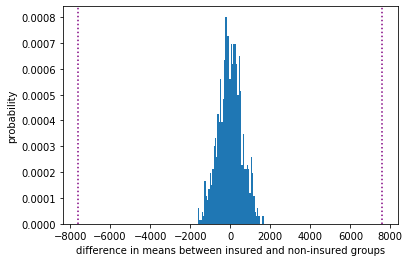

In [33]:
# Plotting in histogram
plt.hist(bs_differences, bins=50, density=True)
plt.xlabel("difference in means between insured and non-insured groups")
plt.ylabel("probability")
plt.axvline(obs_diff, color='purple', linestyle=':')
plt.axvline(-obs_diff, color='purple', linestyle=':')
plt.show()

Q: Compare your p-value above with that obtained using the t-test function in the previous assignment. Do you think you would want to try to perform enough bootstrap replicates to observe a random difference as large as that we did observe?

A: We found a p-value = 0, and in previous assignment by using t-test, we found a pvalue=2.9900648814027235e-111 which is very close to zero. These two results are pretty consistent, and we do not need to perform more bootstraps.

Q: Consider the two variants of the t-test we performed in the previous assignment. Which one would you use now?

A: Welch's t-test where the variances of the two groups are unequal.

Q: If, instead of being asked whether the means of two groups were different, you were working with an ad-recommender team who wanted to release a new recommendation algorithm, and you were looking at click-through rate both for the current algorithm (call it A) and from trials of their new algorithm (call it B), would you perform a two-sided test as above? What would be your null and alternative hypotheses and what would be the real-world consequence of rejecting the null hypothesis?

H0: The test statistics is not affected by the change in the algorithm
H1: The test statistics is affected by the change in the algorithm

Rejecting the null hypothesis means the new recommendation algorithm affects the rate eithe positively or negatively.